In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sys
import os

import neural_net
print(os.getcwd())
%pylab inline

/Users/nd/projects/pml-neuralnet-hw/PML-DNN-hw1/neural_net
Populating the interactive namespace from numpy and matplotlib


## Regression - homework

In [2]:
dropbox_path = '/Users/nd/projects/pml-neuralnet-hw/PML-DNN-hw1/'
filename = 'parkinsons_supervised.csv'

In [11]:
# Set the hyperparameters
layer_sizes = [128,32]
batch_size = 25
learning_rate = .001
dropout_prob = 1.0
weight_penalty = 0.0
clip_gradients = False

for i in range(0,5):
                clip_gradients = False
                print('this is iteration ' + str(i) + ' !!!!!')
                net = neural_net.NeuralNetwork(dropbox_path + filename, 'homework', 
                                           [128,32], batch_size, learning_rate, dropout_prob, 
                                           weight_penalty, clip_gradients, model_type='regression')
                net.train(num_steps=50000, output_every_nth=10000)
                dict[(str(layer_sizes[0]) + "x" + str(layer_sizes[1]), learning_rate, weight_penalty, dropout_prob, i)] = net.test_on_validation()

this is iteration 0 !!!!!
Original data length was 5875
After dropping rows with nan in any label column, length is 5875
3581 rows in training data
1167 rows in validation data
1127 rows in testing data

Performing regression.
Input dimensions (number of features): 16
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('16x128', '128'), ('128x32', '32'), ('32x2', '2')]
Training iteration 0
	 Training RMSE 28.3912
	 Validation RMSE 27.2912
	 Loss 27.2912
Training iteration 10000
	 Training RMSE 6.44604
	 Validation RMSE 7.78634
	 Loss 7.78634
Training iteration 20000
	 Training RMSE 7.8242
	 Validation RMSE 7.56182
	 Loss 7.56182
Training iteration 30000
	 Training RMSE 6.51316
	 Validation RMSE 7.54492
	 Loss 7.54492
Training iteration 40000
	 Training RMSE 5.48059
	 Validation RMSE 7.65478
	 Loss 7.65478
Final RMSE on validation data is: 7.82023
this is iteration 1 !!!!!
Original data length was 5875
After dropping rows

In [4]:
reload(neural_net)
neural_net.reload_files()

In [5]:
net = neural_net.NeuralNetwork(dropbox_path + filename, 'homework', 
                               layer_sizes, batch_size, learning_rate, dropout_prob, 
                               weight_penalty, clip_gradients, model_type='regression')

Original data length was 5875
After dropping rows with nan in any label column, length is 5875
3581 rows in training data
1167 rows in validation data
1127 rows in testing data

Performing regression.
Input dimensions (number of features): 16
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('16x128', '128'), ('128x32', '32'), ('32x2', '2')]


In [6]:
#find good hyperparameters for the base set

layer_size_cands = [[64, 32], [128, 64, 32], [32, 32, 32], [32, 16, 8]]
learning_rates = [0.01, .1]
weight_penalties = [0.01, .05]
dropouts = [0.9, .8]





rmse_results = []
dict = {}
import time
start = time.time()
index = 0
for learning_rate in learning_rates:
    for weight_penalty in weight_penalties:
        for dropout_prob in dropouts:
            for i in range(0,5):
                clip_gradients = True
                print('this is iteration ' + str(i) + ' !!!!!')
                net = neural_net.NeuralNetwork(dropbox_path + filename, 'homework', 
                                           layer_size_cands[index], batch_size, learning_rate, dropout_prob, 
                                           weight_penalty, clip_gradients, model_type='regression')
                net.train(num_steps=50000, output_every_nth=10000)
                dict[(str(layer_size_cands[index][0]) + "x" + str(layer_size_cands[index][1]), learning_rate, weight_penalty, dropout_prob, i)] = net.test_on_validation()
                    
end = time.time()

this is iteration 0 !!!!!
Original data length was 5875
After dropping rows with nan in any label column, length is 5875
3581 rows in training data
1167 rows in validation data
1127 rows in testing data

Performing regression.
Input dimensions (number of features): 16
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('16x64', '64'), ('64x32', '32'), ('32x2', '2')]
Training iteration 0
	 Training RMSE 27.6594
	 Validation RMSE 26.844
	 Loss 27.2316
Training iteration 10000
	 Training RMSE 8.59777
	 Validation RMSE 8.21899
	 Loss 8.62503
Training iteration 20000
	 Training RMSE 7.62288
	 Validation RMSE 8.21914
	 Loss 8.62539
Training iteration 30000
	 Training RMSE 7.68358
	 Validation RMSE 8.10464
	 Loss 8.51505
Training iteration 40000
	 Training RMSE 6.69054
	 Validation RMSE 8.24626
	 Loss 8.64632
Final RMSE on validation data is: 8.26552
this is iteration 1 !!!!!
Original data length was 5875
After dropping rows wi

2086.07974815


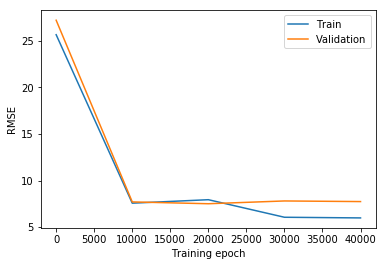

{('64x32', 0.1, 0.05, 0.8, 1): 9.7015028, ('64x32', 0.1, 0.01, 0.9, 1): 9.2893648, ('64x32', 0.01, 0.05, 0.8, 2): 9.1955729, ('64x32', 0.1, 0.01, 0.8, 3): 9.3401194, ('64x32', 0.001, 0.0, 1.0, 4): 7.7447333, ('64x32', 0.01, 0.01, 0.9, 0): 8.265521, ('64x32', 0.01, 0.05, 0.9, 1): 9.0620279, ('64x32', 0.1, 0.05, 0.8, 3): 9.6931171, ('64x32', 0.1, 0.01, 0.9, 3): 9.5585403, ('64x32', 0.1, 0.01, 0.9, 4): 9.2078905, ('64x32', 0.01, 0.01, 0.8, 0): 8.2714758, ('64x32', 0.1, 0.01, 0.8, 4): 9.6931038, ('64x32', 0.1, 0.05, 0.9, 0): 9.5591745, ('64x32', 0.001, 0.0, 1.0, 2): 7.7205057, ('64x32', 0.01, 0.01, 0.9, 2): 8.2463541, ('64x32', 0.01, 0.05, 0.9, 3): 9.1753168, ('64x32', 0.01, 0.05, 0.9, 4): 9.1251106, ('64x32', 0.1, 0.05, 0.8, 4): 9.7003183, ('64x32', 0.01, 0.05, 0.8, 1): 9.1103058, ('64x32', 0.01, 0.01, 0.8, 2): 8.3733397, ('64x32', 0.1, 0.05, 0.9, 2): 9.6931782, ('64x32', 0.001, 0.0, 1.0, 0): 7.8202262, ('64x32', 0.1, 0.01, 0.9, 0): 9.3123007, ('64x32', 0.01, 0.05, 0.8, 3): 9.1697445, ('6

In [16]:
print end-start
net.plot_training_progress()
print dict


In [39]:
#del dict[('64x32', 0.001, 0.0, 1.0, 1)]
dict[('128x32', 0.001, 0.0, 1.0, 1)] = 7.7403231

In [42]:
print(min(dict.values()))

7.7205057


### debugging neural network using session.run

In [14]:
X, Y = net.data_loader.get_train_batch(10)
feed_dict = {net.tf_X: X,
             net.tf_Y: Y,
             net.tf_dropout_prob: 1.0}
print "X", np.shape(X), "Y", np.shape(Y)

X (10, 20) Y (10, 2)


In [19]:
print net.session.run([net.tf_X,net.tf_Y, net.logits], feed_dict=feed_dict)
#print "X", np.shape(tf_X), "Y", np.shape(tf_Y), "logits", np.shape(logits)

[array([[ 0.35033551, -1.78116202, -0.68470937, -1.40052152, -0.30320659,
        -0.1525038 , -0.25575474, -0.20323569, -0.25678062,  0.96460992,
         0.52912575,  0.97140121,  1.18462873,  0.82155502,  0.97114718,
        -0.20225847, -0.40879247,  1.4391408 ,  0.14954013, -0.16320474],
       [-0.62218499, -0.76638234,  1.46047366,  0.49315697, -0.65916598,
        -0.88036144, -0.54216307, -0.54065609, -0.54115933, -0.91260463,
        -0.95570928, -0.86152756, -0.82540822, -0.99184608, -0.86126816,
        -0.48749965,  1.05310428, -2.19696879,  0.07246424, -1.14588571],
       [ 0.4313789 , -0.87913561,  1.46047366, -1.33126593, -0.18627307,
        -0.4621276 , -0.04247193, -0.14307547, -0.0434966 ,  0.47931957,
         0.38813251,  0.52619565,  0.54269242,  0.58743757,  0.52594227,
        -0.46723726,  0.82877713, -1.87455714,  1.49147642, -0.31518951],
       [-0.70322841,  0.92491704,  1.46047366, -0.54672247, -0.43217739,
        -0.71460325, -0.29841128, -0.35755974, 

In [18]:
# To see the tensorflow model you've built in tensorboard, run the following
journalist = tf.summary.FileWriter(net.checkpoint_dir, graph=net.session.graph)
journalist.flush()

# Now enter the following command at the command line
# > tensorboard --logdir 'saved_models'
# (you may need to replace 'saved_models' with the path to the actual 
# net.checkpoint_dir you are using)